# Задание

1.   Проведем базовый анализ данных, разработаем базовую модель и оценим работу модели


In [ ]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
feature_names = iris_data['feature_names']
df = pd.DataFrame(iris_data['data'], columns=feature_names)
species_names = iris_data['target_names']
target_idxs = iris_data['target']
df['species'] = species_names[target_idxs]

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

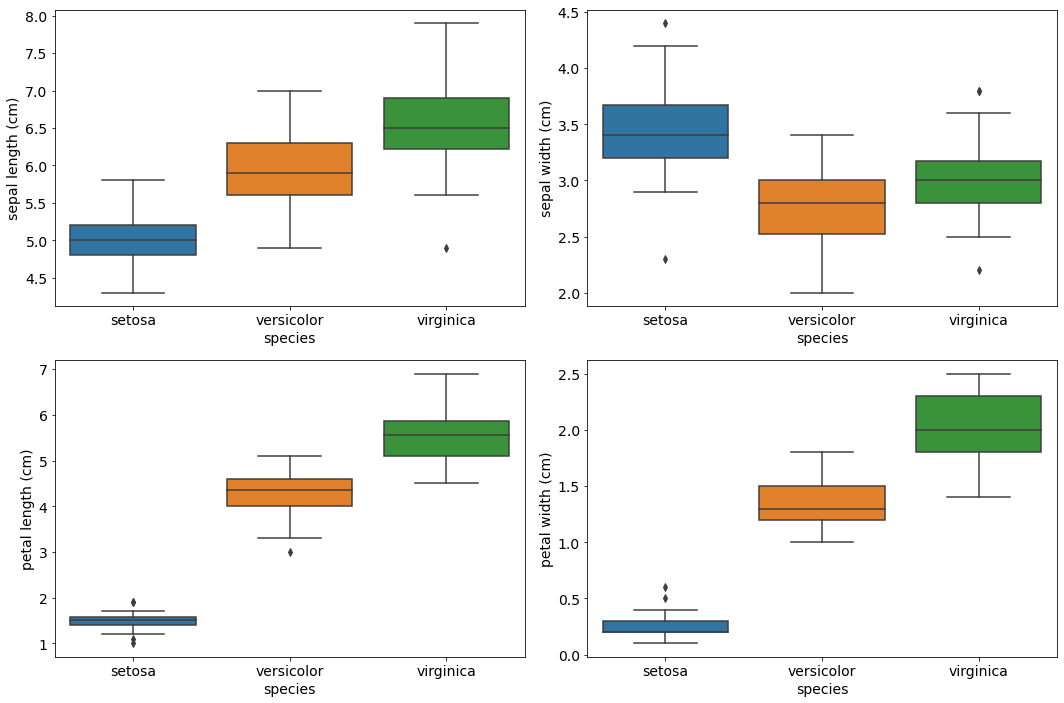

In [ ]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.boxplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();

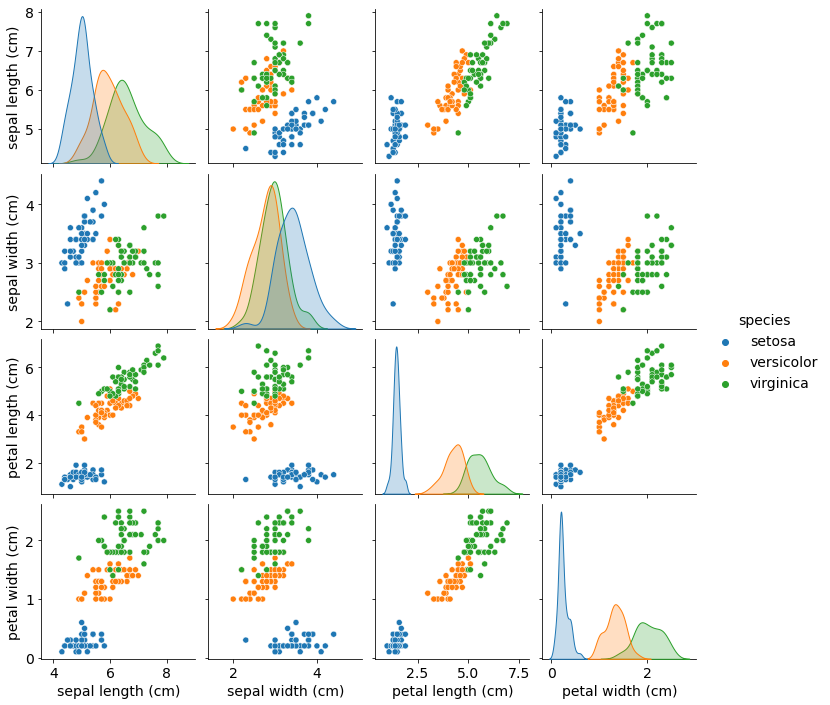

In [ ]:
sns.pairplot(df, hue='species')

In [ ]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.7

X = df[feature_names]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
sample = X_test.iloc[0]

prediction = logreg.predict([sample])
predict_proba = logreg.predict_proba([sample])
predict_log_proba = logreg.predict_log_proba([sample])

print(f'  Sample:\n{sample}')
print(f'  Prediction proba:\n{predict_proba[0]}')
print(f'  Prediction proba sum:\n{sum(predict_proba[0])}')
print(f'  Prediction log proba:\n{predict_log_proba[0]}')
print(f'  Prediction:\n{prediction}')
print(f'  Prediction name:\n{species_names[prediction]}')

  Sample:
sepal length (cm)    7.3
sepal width (cm)     2.9
petal length (cm)    6.3
petal width (cm)     1.8
Name: 107, dtype: float64
  Prediction proba:
[1.99459949e-06 3.30316900e-02 9.66966315e-01]
  Prediction proba sum:
1.0000000000000002
  Prediction log proba:
[-13.12506729  -3.41028788  -0.03359162]
  Prediction:
[2]
  Prediction name:
['virginica']


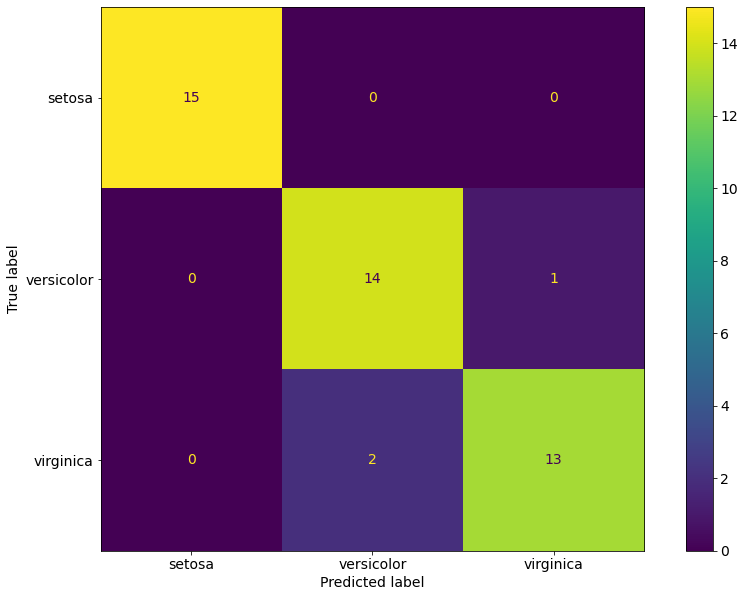

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)

In [ ]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
from sklearn.model_selection import cross_val_score

X = df[feature_names]
y = target_idxs

# Данная функция используется только для оценки 
#   (она обучает модель внутри, но не возвращает ее)
scores = cross_val_score(
    logreg,     # Модель для оценки
    X,          # Данные для обучения
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Scores: [0.96658312 1.         0.93265993 0.96658312 1.        ]
F1 (macro):  0.97 (+/-  0.05)


2.   Отобразим ROC-кривую с помощью sklearn.metrics.roc_curve

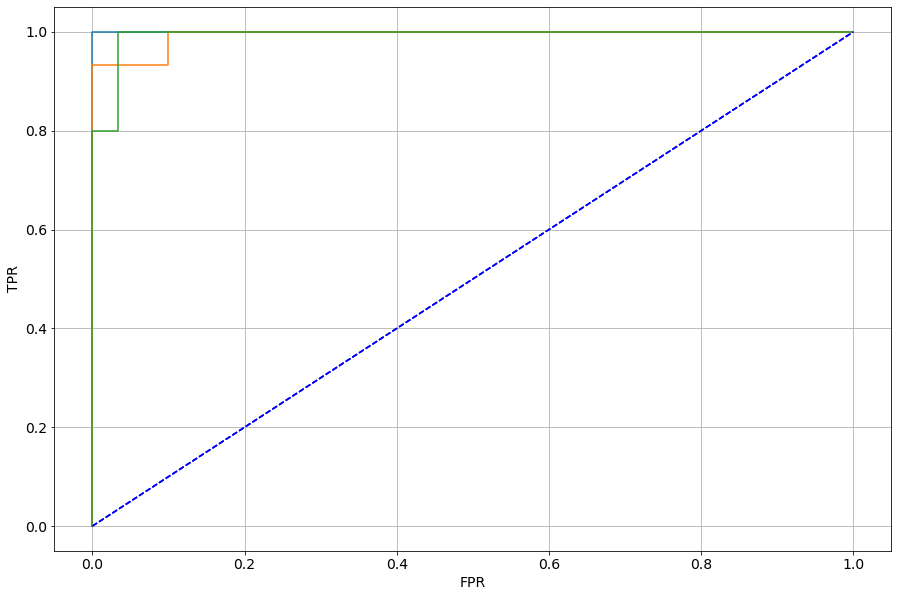

In [ ]:
from sklearn.metrics import roc_curve
diag_values = np.array([
    [0, 0],
    [1, 1],
])
y_pred = logreg.predict_proba(X_test)
tpr_values = []
fpr_values = []
for i in range (X_test.shape[1]-1):
    fpr_0, tpr_0, thresholds = roc_curve(y_test, y_pred[:,i], pos_label = i)
    plt.plot(fpr_0, tpr_0)
    plt.plot(diag_values[:,0], diag_values[:,1], 'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)

3.   Оценим работу модели при использовании StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

scores = cross_val_score(
    logreg,     # Модель для оценки
    scaler.transform(X),          # Данные для обучения
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Scores: [0.96658312 0.96658312 0.93265993 0.89974937 1.        ]
F1 (macro):  0.95 (+/-  0.07)


4.   Исследуем работу модели LogisticRegression с изменением аргумента (3 изменения / различных значения)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=700,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=10,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#iter = 100 - default
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=100,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Установка значения по умолчанию не изменило работу

5.   Оценим работу модели при обученири на двух признаках

In [ ]:
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.7

X = df[[feature_names[0],feature_names[1]]]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.60      0.60      0.60        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [ ]:
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.7

X = df[[feature_names[2],feature_names[3]]]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Во втором случае точность выше

6.   Найдём лучшую пару признаков методом кросс-валидации на обучающих данных

In [ ]:
from sklearn.model_selection import cross_val_score

X = df[feature_names]
y = target_idxs

# Данная функция используется только для оценки 
#   (она обучает модель внутри, но не возвращает ее)
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        if (j > i):
          X_t = X[[feature_names[i], feature_names[j]]]
          scores = cross_val_score(
              logreg,     # Модель для оценки
              X_t,         # Данные для обучения
              y,          # Разметка для обучения
              cv=5,       # Количество фолдов
              scoring='f1_macro'  # Желаемая метрика
          )
          print(feature_names[i], feature_names[j])
          print(f'Scores: {scores}')
          print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

sepal length (cm) sepal width (cm)
Scores: [0.72222222 0.82949702 0.76608187 0.86666667 0.86807706]
F1 (macro):  0.81 (+/-  0.12)
sepal length (cm) petal length (cm)
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
sepal length (cm) petal width (cm)
Scores: [0.93333333 0.96658312 0.93265993 0.93265993 1.        ]
F1 (macro):  0.95 (+/-  0.05)
sepal width (cm) petal length (cm)
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
sepal width (cm) petal width (cm)
Scores: [0.93333333 0.96658312 0.89974937 0.93265993 0.96658312]
F1 (macro):  0.94 (+/-  0.05)
petal length (cm) petal width (cm)
Scores: [0.96658312 0.96658312 0.93265993 0.93333333 1.        ]
F1 (macro):  0.96 (+/-  0.05)


Лучшая пара - petal length + petal width

7.   Освоим и изучим работу подхода классификации KNN, продемонстрируем работу и основную суть метода и сравним с показателями логистической регрессии

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(
    neigh,     # Модель для оценки
    X,          # Данные для обучения
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Scores: [0.96658312 0.96658312 0.93265993 0.96658312 1.        ]
F1 (macro):  0.97 (+/-  0.04)


Метрика f1 улучшается по сравнению с логистической регрессией

8.   Оценим влияние аргумента n_neighbors на работу модели KNN и построим график основных показателей метрик от значения количества соседей

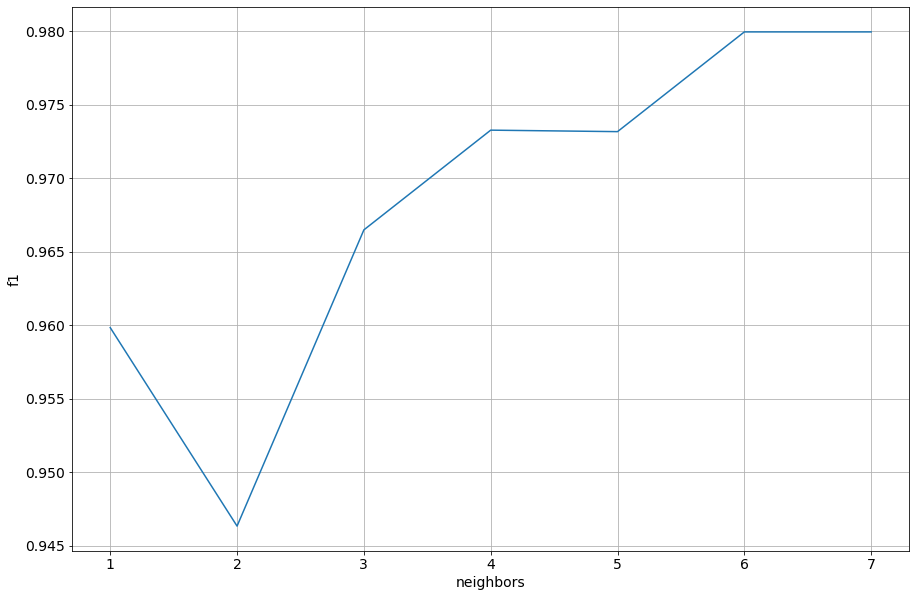

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(1,8):
    neigh = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(
        neigh,     # Модель для оценки
        X,          # Данные для обучения
        y,          # Разметка для обучения
        cv=5,       # Количество фолдов
        scoring='f1_macro'  # Желаемая метрика
    )
    arr.append(scores.mean())

plt.plot(range(1,8),arr)
plt.grid(True)
plt.ylabel('f1')
plt.xlabel('neighbors')
plt.show()  

9.   Отобразим плоскость решений при использовании двух признаков как лучшей модели логистической регрессии, так и лучшей модели KNN

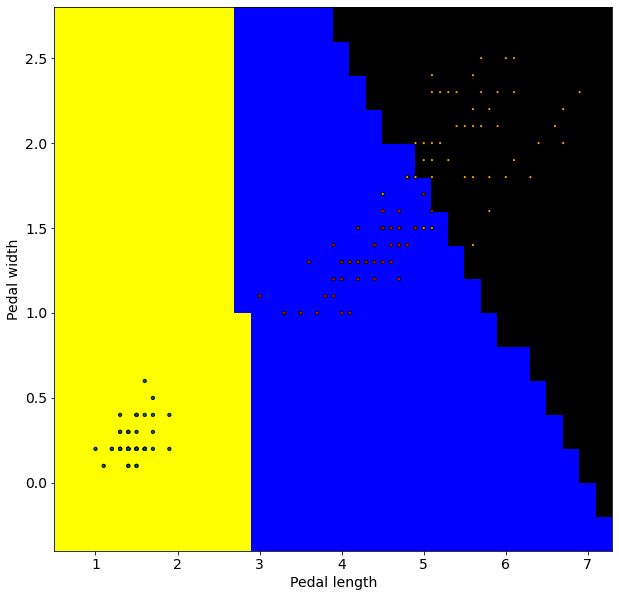

In [ ]:
from matplotlib.colors import ListedColormap
X = iris_data.data[:,2:4]

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X, y)

h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap1 = ListedColormap(['yellow','blue','black'])
cmap2 = ListedColormap(['green','red','orange'])

plt.figure(1, figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap2,s = 10)
plt.xlabel('Pedal length')
plt.ylabel('Pedal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

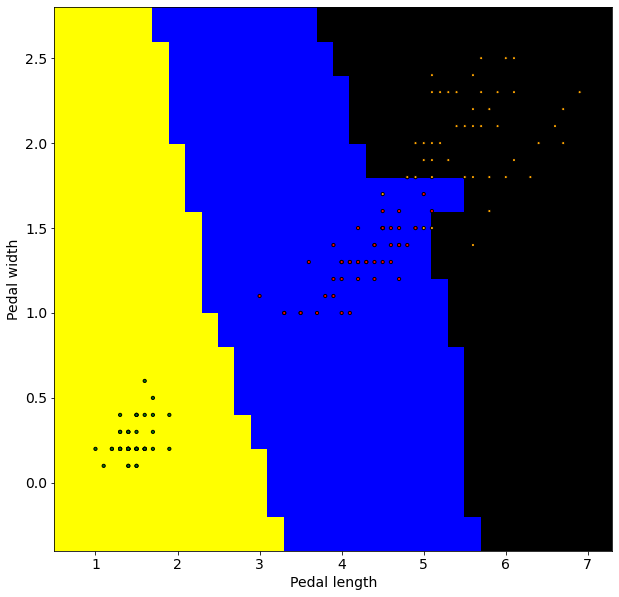

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X,y) 

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap1 = ListedColormap(['yellow','blue','black'])
cmap2 = ListedColormap(['green','red','orange'])

plt.figure(1, figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap2,s = 10)
plt.xlabel('Pedal length')
plt.ylabel('Pedal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Вопросы


* Почему массив весов имеет размер 3х4, а массив смещений - 3 элемента в модели логистической регрессии?
* В чем различия методов усреднения статистики `macro`, `micro` и `weighted`?
* Что означает `support` в отчете классификации?
* Продемонстрируйте расчет показателей `recall` и `precision` одного из классов по любой из CM.
* Что происходит при использовании аргумента `stratify` при разделении на выборки? Что будет, если не использовать данный аргумент? 
* В чем разницах подходов обучения модели линейной регрессии и логистичесой регрессии?
* На основе чего работает метод KNN?
* Как влияет количество соседей на работу модели? 
* В чем отличие кросс-валидации от разделения на выборки обучения/валидации/теста? Для чего применяется выборка обучения? Валидации? А теста?

Ответы:
*   Имеется 3 класса и 4 признака, поэтому массив весов 3х4
*   Macro - вычисляет f1 без учёта весов; micro - вычисляет f1 с помощью общего количества TP, FN, FP; вычисляет f1 для каждого класса независимо, но когда их объединяет, то использует веса.
*   Количество вхождений класса в набор данных


Пример расчёта показателей recall и precision одного из классов по любой из СМ


class1
0.9333333333333333
0.875


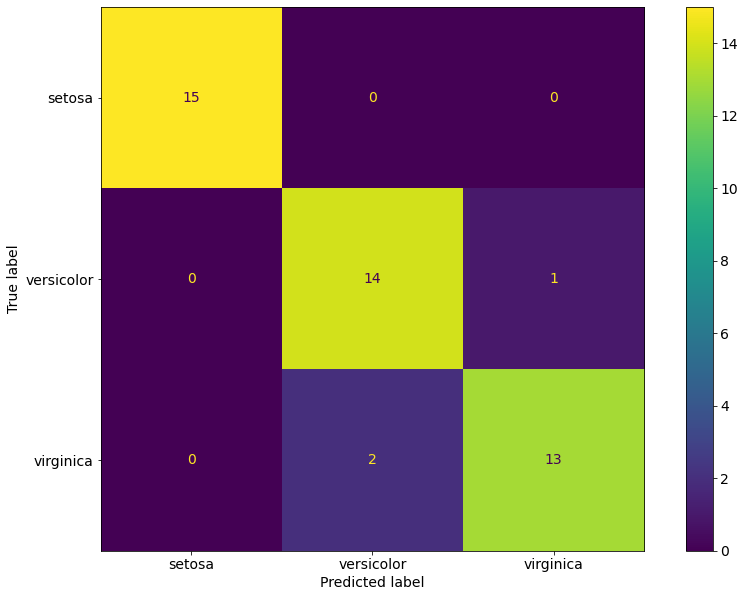

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=100,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

matrix = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)

recall = matrix.confusion_matrix[1,1]/np.sum(matrix.confusion_matrix[1,:])
precision = matrix.confusion_matrix[1,1]/np.sum(matrix.confusion_matrix[:,1])
print(f'class{1}')
print(recall)
print(precision)

Продолжение ответов:
*   Указывает пропорцию при разделении, иначе по умолчанию
*   Линейная для поиска зависимости, а логистическая для классификации
*   Объект относится к тмоу классу, которому принадлежит ближайшие к нему объекты обучающей выборки
*   При увеличении соседей (но до какого-то определенного числа) число F1 растёт
*   Использование кросс-валидации позволяет произвести более обобщенную оценку по сравнению с явным выделением части набора данных. Выборка обучения - для обучения модели; валидация - для проверки работоспособности; тест - конечная проверка